In [176]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [104]:
raw_dataset = pd.read_csv('matches_new.csv')
dataset = raw_dataset.dropna()
dataset.head()

,league,season,round,date,time,H_team_name,H_goals,A_goals,A_team_name,H_possession,...,A_touches,A_tackles,A_interceptions,A_aerials_won,A_clearances,A_offsides,A_goal_kicks,A_throw_ins,A_long_balls,A_own_goals
0,La Liga,2024-2025,Matchweek 1,2024-08-15,19:00,Athletic Club,1,1,Getafe,68,...,354,22,9,18,23,6,2,24,77,0
1,La Liga,2024-2025,Matchweek 1,2024-08-15,21:30,Real Betis,1,1,Girona,39,...,747,21,8,1,13,3,11,26,56,0
2,La Liga,2024-2025,Matchweek 1,2024-08-16,19:00,Celta Vigo,2,1,Alavés,63,...,451,17,8,6,12,3,9,22,81,0
3,La Liga,2024-2025,Matchweek 1,2024-08-16,20:30,Las Palmas,2,2,Sevilla,48,...,653,13,10,20,26,2,6,20,62,1
4,La Liga,2024-2025,Matchweek 1,2024-08-17,19:00,Osasuna,1,1,Leganés,61,...,478,20,9,18,43,2,12,20,81,1


In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4447 entries, 0 to 4446
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   league              4447 non-null   object
 1   season              4447 non-null   object
 2   round               4447 non-null   object
 3   date                4447 non-null   object
 4   time                4447 non-null   object
 5   H_team_name         4447 non-null   object
 6   H_goals             4447 non-null   int64 
 7   A_goals             4447 non-null   int64 
 8   A_team_name         4447 non-null   object
 9   H_possession        4447 non-null   int64 
 10  H_passes_completed  4447 non-null   int64 
 11  H_passes_total      4447 non-null   int64 
 12  H_shots_on_target   4447 non-null   int64 
 13  H_shots_total       4447 non-null   int64 
 14  H_saves             4447 non-null   int64 
 15  H_yellow_cards      4447 non-null   int64 
 16  H_red_cards         4447

In [107]:
dataset['H_saves_percentage'] = dataset['H_saves'] / dataset['A_shots_on_target'] * 100
dataset['A_saves_percentage'] = dataset['A_saves'] / dataset['H_shots_on_target'] * 100
dataset['H_passes_percentage'] = dataset['H_passes_completed'] / dataset['H_passes_total'] * 100
dataset['A_passes_percentage'] = dataset['A_passes_completed'] / dataset['A_passes_total'] * 100
dataset['goal_diff'] = dataset['H_goals'] - dataset['A_goals']

pca_result = PCA(n_components=1, random_state=24)
pca_result.fit_transform(dataset[['H_goals', 'A_goals', 'goal_diff']])
dataset['result'] = pca_result.transform(dataset.loc[:, ('H_goals', 'A_goals', 'goal_diff')]).flatten()

In [108]:
dataset.fillna(0, inplace=True)
dataset.describe()

,H_goals,A_goals,H_possession,H_passes_completed,H_passes_total,H_shots_on_target,H_shots_total,H_saves,H_yellow_cards,H_red_cards,...,A_goal_kicks,A_throw_ins,A_long_balls,A_own_goals,H_saves_percentage,A_saves_percentage,H_passes_percentage,A_passes_percentage,goal_diff,result
count,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,...,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000
mean,1.432201,1.153137,51.201934,388.124578,489.845739,4.264898,13.197436,2.472004,2.277490,0.109512,...,8.504160,19.704295,68.807511,0.042501,67.374033,68.592198,77.827309,76.891153,0.279065,0.000000
std,1.215741,1.096832,10.929565,125.989388,123.111269,2.371765,5.136303,1.748096,1.534399,0.337247,...,3.452254,5.899598,15.244102,0.202863,31.740284,28.118981,7.256029,7.731257,1.666038,2.045274
min,0.000000,0.000000,18.000000,100.000000,201.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,25.000000,0.000000,0.000000,0.000000,49.751244,40.540541,-7.000000,-8.459996
25%,1.000000,0.000000,43.000000,296.000000,399.500000,3.000000,10.000000,1.000000,1.000000,0.000000,...,6.000000,16.000000,58.000000,0.000000,50.000000,50.000000,73.448152,72.597009,-1.000000,-0.904060
50%,1.000000,1.000000,51.000000,376.000000,479.000000,4.000000,13.000000,2.000000,2.000000,0.000000,...,8.000000,19.000000,68.000000,0.000000,75.000000,72.727273,78.896882,78.097345,0.000000,0.374621
75%,2.000000,2.000000,59.000000,469.000000,569.000000,6.000000,16.000000,3.000000,3.000000,0.000000,...,11.000000,23.000000,79.000000,0.000000,100.000000,100.000000,83.190309,82.679739,1.000000,1.537155
max,8.000000,7.000000,82.000000,935.000000,1027.000000,17.000000,46.000000,13.000000,10.000000,3.000000,...,26.000000,47.000000,133.000000,2.000000,100.000000,100.000000,92.673993,92.987013,7.000000,8.628509


In [109]:
num_features = dataset.select_dtypes(exclude=[object]).columns
num_features = num_features.drop(['H_goals', 'A_goals', 'goal_diff'])

data_num = dataset[num_features]

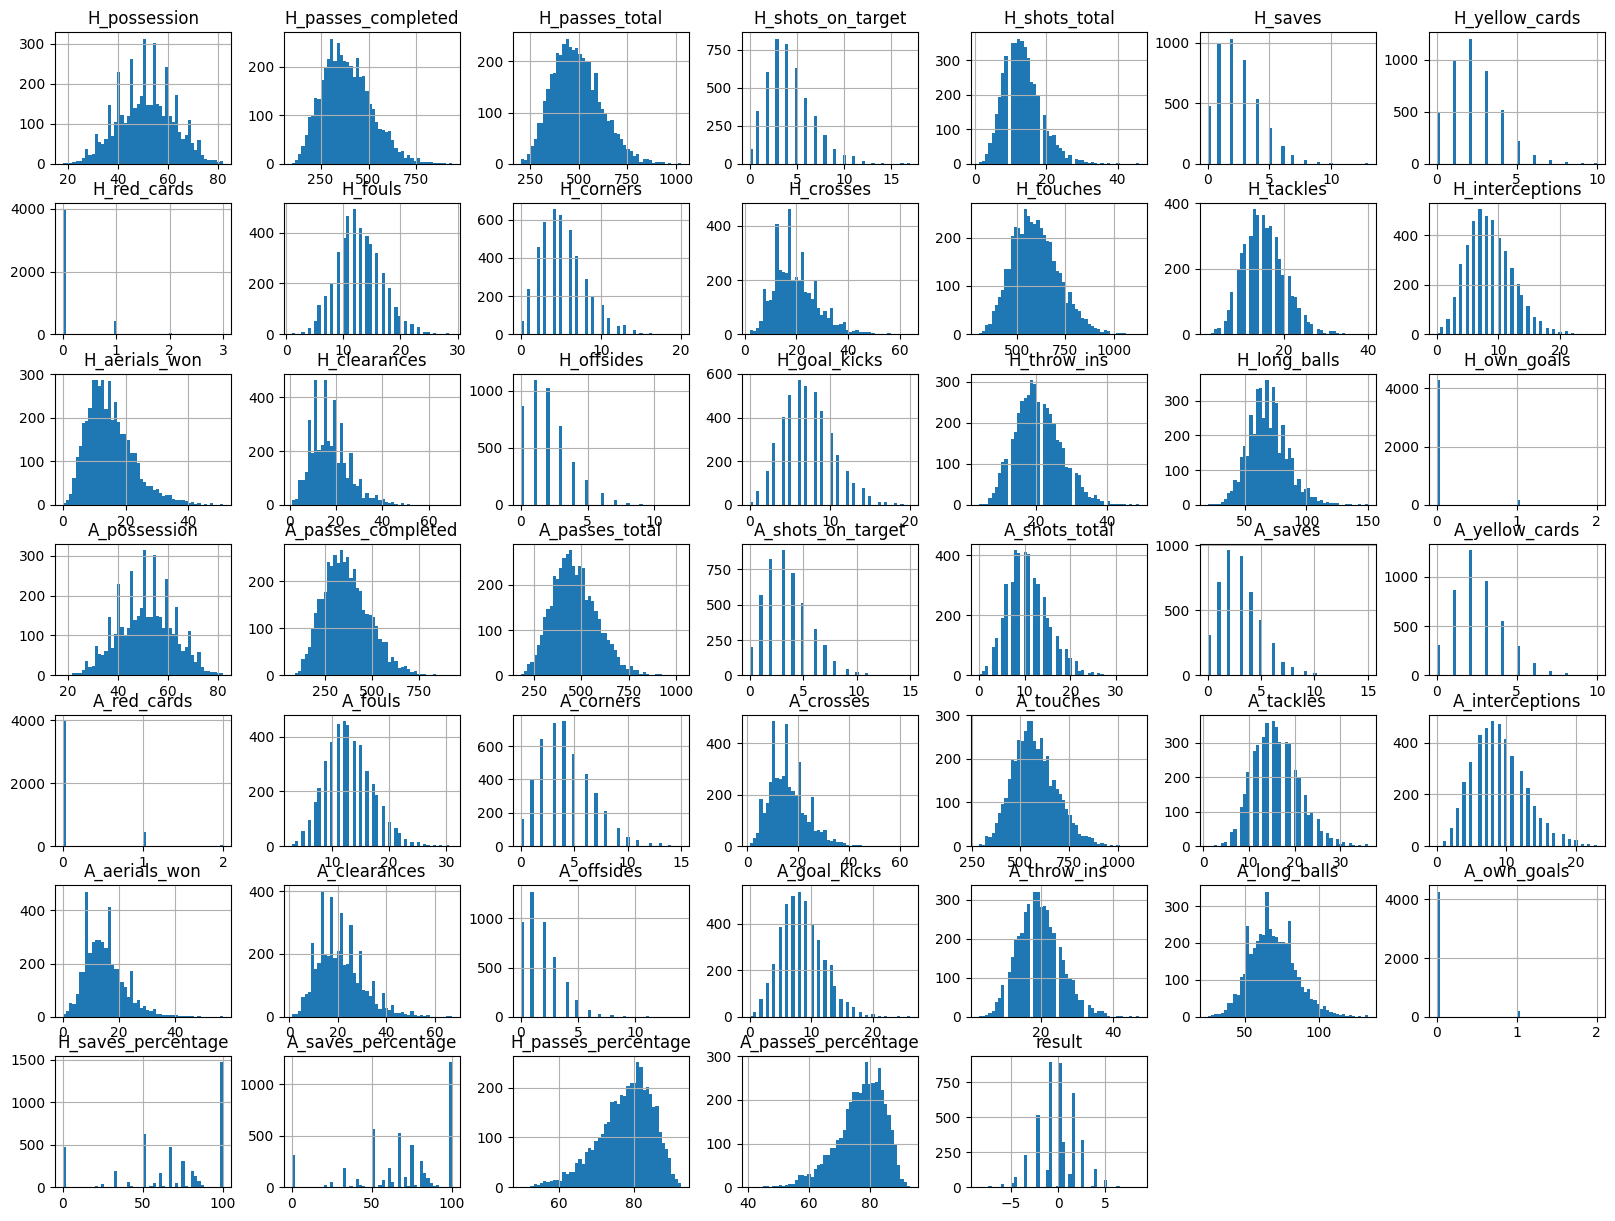

In [110]:
data_num.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

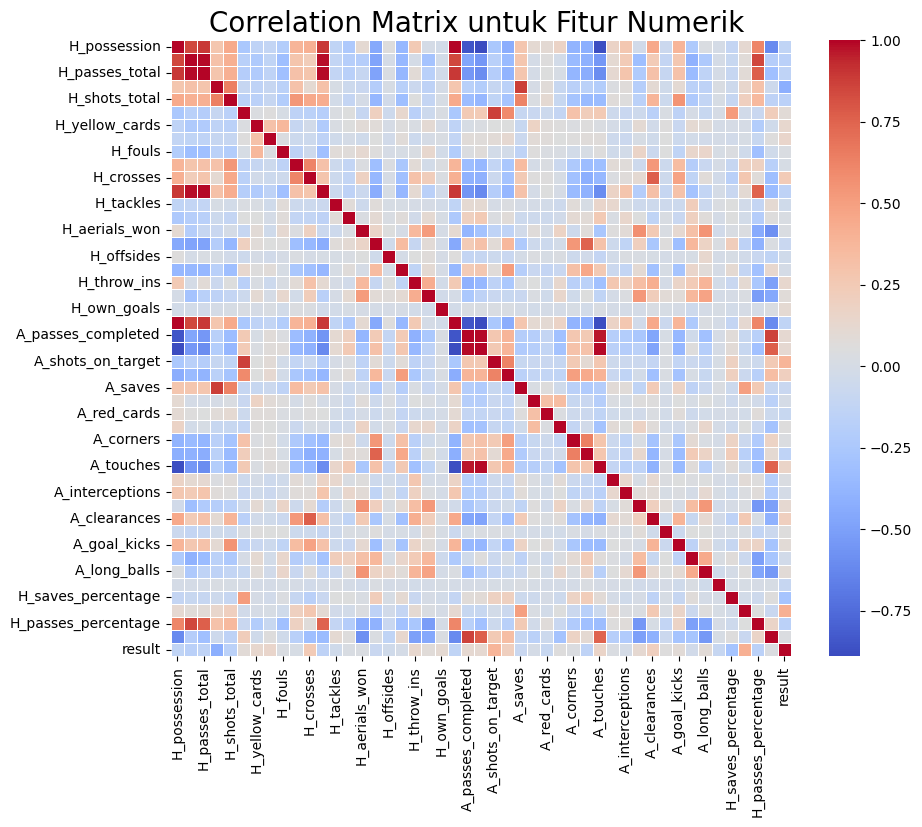

In [111]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_num.corr().round(2)
sns.heatmap(data=correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [112]:
threshold = 0.1
result_corr = correlation_matrix.loc[(correlation_matrix['result'] >= threshold) | (correlation_matrix['result'] <= threshold * -1)]
corr_cols = result_corr['result']
corr_cols

H_possession          -0.13
H_passes_completed    -0.17
H_passes_total        -0.14
H_shots_on_target     -0.42
H_shots_total         -0.16
H_yellow_cards         0.13
H_red_cards            0.15
H_crosses              0.24
H_touches             -0.15
H_throw_ins            0.13
H_own_goals            0.11
A_possession          -0.13
A_passes_completed     0.12
A_passes_total         0.12
A_shots_on_target      0.38
A_shots_total          0.21
A_crosses             -0.14
A_touches              0.16
A_aerials_won          0.12
A_clearances           0.21
A_own_goals           -0.10
H_saves_percentage    -0.28
A_saves_percentage     0.41
H_passes_percentage   -0.16
result                 1.00
Name: result, dtype: float64

In [113]:
num_features = data_num.columns
data_num_scaled = data_num[num_features].copy()
scaler = StandardScaler()
scaler.fit(data_num_scaled)
data_num_scaled[num_features] = scaler.transform(data_num.loc[:, num_features])

In [114]:
X = data_num_scaled.drop(['result'], axis=1)
y = data_num['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 128)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4447
Total # of sample in train dataset: 3557
Total # of sample in test dataset: 890


In [115]:
X_train.describe().round(4)

,H_possession,H_passes_completed,H_passes_total,H_shots_on_target,H_shots_total,H_saves,H_yellow_cards,H_red_cards,H_fouls,H_corners,...,A_clearances,A_offsides,A_goal_kicks,A_throw_ins,A_long_balls,A_own_goals,H_saves_percentage,A_saves_percentage,H_passes_percentage,A_passes_percentage
count,3557.0000,3557.0000,3557.0000,3557.0000,3557.0000,3557.0000,3557.0000,3557.0000,3557.0000,3557.0000,...,3557.0000,3557.0000,3557.0000,3557.0000,3557.0000,3557.0000,3557.0000,3557.0000,3557.0000,3557.0000
mean,0.0108,0.0058,0.0067,0.0006,0.0024,-0.0006,-0.0126,-0.0029,-0.0092,0.0054,...,0.0108,0.0076,0.0055,0.0020,0.0081,0.0095,-0.0031,0.0101,0.0059,-0.0099
std,0.9990,0.9937,0.9946,1.0057,1.0009,1.0065,1.0005,0.9972,1.0028,0.9992,...,1.0049,0.9971,1.0154,0.9917,1.0039,1.0226,1.0025,0.9981,0.9902,0.9990
min,-3.0382,-2.2872,-2.3465,-1.7984,-2.3750,-1.4143,-1.4845,-0.3248,-3.0137,-1.8170,...,-2.1383,-1.1336,-2.4636,-2.8317,-2.8741,-0.2095,-2.1229,-2.4396,-3.8698,-4.7023
25%,-0.6590,-0.7234,-0.7136,-0.5334,-0.6226,-0.8422,-0.8327,-0.3248,-0.7180,-0.7677,...,-0.7472,-0.5091,-0.7255,-0.6280,-0.7090,-0.2095,-0.5474,-0.6613,-0.5783,-0.5617
50%,-0.0185,-0.1042,-0.0881,-0.1117,-0.0384,-0.2700,-0.1809,-0.3248,-0.2079,-0.0683,...,-0.1051,0.1154,-0.1461,-0.1194,-0.0530,-0.2095,0.2403,0.2279,0.1514,0.1334
75%,0.7136,0.6499,0.6593,0.7316,0.5457,0.3021,0.4709,-0.3248,0.5574,0.6312,...,0.6439,0.7400,0.7230,0.5587,0.6687,-0.2095,1.0280,1.1171,0.7294,0.7408
max,2.8182,4.3411,4.3637,5.3701,6.3871,6.0232,5.0335,8.5718,4.1284,5.1778,...,4.9244,7.6096,5.0685,4.2882,4.2114,9.6505,1.0280,1.1171,2.0219,2.0024


In [ ]:
models = pd.DataFrame(
    index=['train_mse', 'test_mse'], 
    columns=['LR', 'Polynomial', 'KNN', 'RandomForest', 'Boosting']
)

In [117]:
lin = LinearRegression()
lin.fit(X_train,y_train)

models.loc['train_mse', 'LR'] = mean_squared_error(y_pred = lin.predict(X_train), y_true=y_train)

In [ ]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train)

lin_poly = LinearRegression()
lin_poly.fit(X_poly,y_train)

models.loc['train_mse', 'Polynomial'] = mean_squared_error(y_pred = lin_poly.predict(X_poly), y_true=y_train)

In [118]:
knn_params = {
    'n_neighbors': [int(x) for x in range(1, 10)],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 20, 30, 40, 50],
}
knn = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=knn_params)
knn.fit(X_train, y_train)

models.loc['train_mse', 'KNN'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [119]:
rf_params = {
    'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [16, 24, 32, 64],
}
rf = GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1), param_grid=rf_params)
rf.fit(X_train, y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=rf.predict(X_train), y_true=y_train)          

C:\Users\Nitro\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nitro\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nitro\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Nitro\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 637, in _validate_params
    vali

In [120]:
boosting_params = {
    'n_estimators': [int(x) for x in range(1,10)],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential'],
}
boosting = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=boosting_params)
boosting.fit(X_train, y_train)
models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [121]:
mse = pd.DataFrame(columns=['train', 'test'], index=['LR','KNN','RF','Boosting'])
model_dict = {'LR': lin, 'KNN': knn, 'RF': rf, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

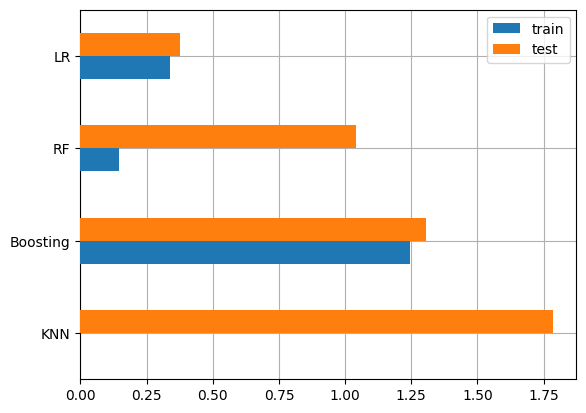

In [122]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [175]:
pred_x = X_test.iloc[:1].copy()
pred_y = y_test.iloc[:1]

y_true = pca_result.inverse_transform(pred_y.values.reshape(1, -1)).flatten().round().astype(int)
pred_dict = {'y_true': f'{y_true[0]}-{y_true[1]} ({y_true[2]})'}
for name, model in model_dict.items():
    y_hat = model.predict(pred_x)
    y_hat = pca_result.inverse_transform(np.array([y_hat])).flatten().round(2)
    pred_dict[name] = f'{y_hat[0]}-{y_hat[1]} ({y_hat[2]})'

pd.DataFrame([pred_dict])

,y_true,LR,KNN,RF,Boosting
0,3-0 (3),2.98--0.01 (3.0),1.76-0.91 (0.85),2.18-0.59 (1.59),2.18-0.59 (1.59)
